**THIS IS A PROJECT ON COST ESTIMATING OF AN INDIVIDUAL'S MEDICAL INSURANCE**

**PROJECT IS ON MACHINE LEARNING MODEL(LINEAR REGRESSION) TO PREDICT THE CHARGE OF MEDICAL INSURANCE**

**DATASET= "insurance.csv" FROM KAGGLE**

............

**IMPORTING SOME LIBRARIES TO START WITH**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**GETTING THE DATASET LOADED**

In [3]:
df_ins=pd.read_csv('insurance.csv')

In [4]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**FROM ABOVE INFORMATION WE CAN SEE THREE COLUMNS NAMELY 'SEX','SMOKER','REGION' ARE IN OBJECT(STRING) FORM ,SO WE NEED TO CONVERT THEM INTO NUMERIC FORM TO USE REGRESSION MODEL**

**CONVERTING OBJECT COLUMN INTO NUMERICAL FORM**

In [8]:
df_ins['sex']=df_ins['sex'].apply({'male':1,'female':2}.get)
df_ins['smoker']=df_ins['smoker'].apply({'yes':1,'no':0}.get)
df_ins['region']=df_ins['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [9]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [14]:
df_ins.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [16]:
df_ins.isnull().sum() #there are no null values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
df_ins.shape

(1338, 7)

**PERFORMING EXPLORATORY DATA ANALYSIS**

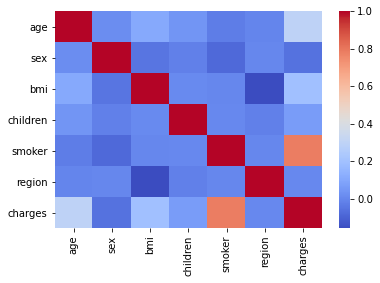

In [61]:
sns.heatmap(df_ins.corr(),cmap='coolwarm')

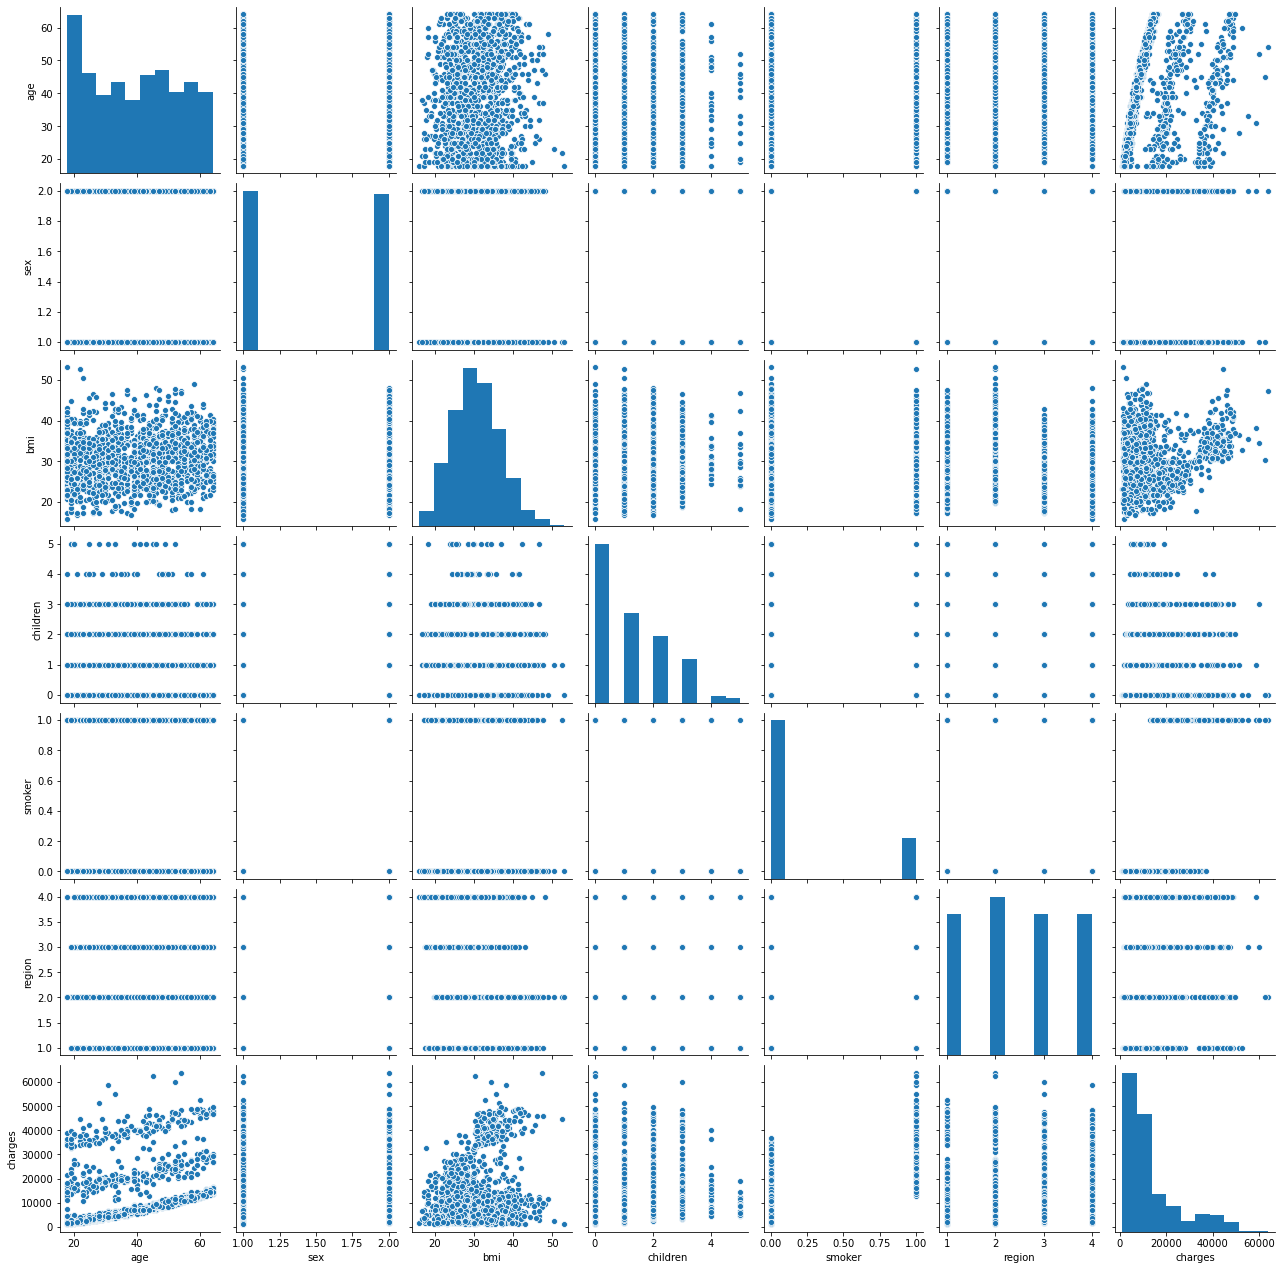

In [22]:
sns.pairplot(df_ins)

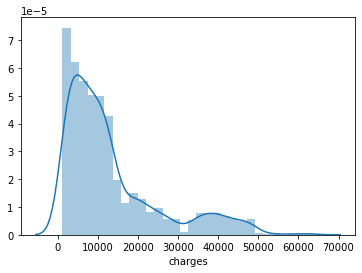

In [23]:
sns.distplot(df_ins['charges'])

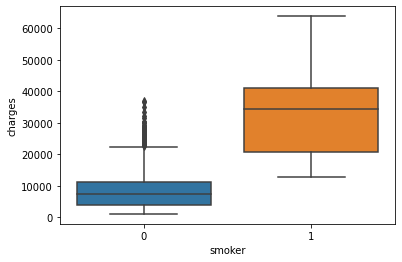

In [64]:
sns.boxplot(x='smoker',y='charges',data=df_ins)

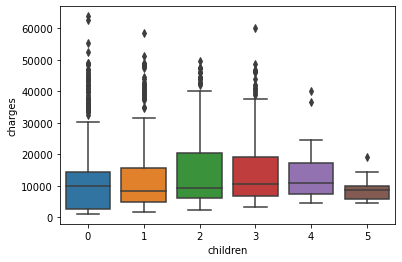

In [62]:
sns.boxplot(x='children',y='charges',data=df_ins)

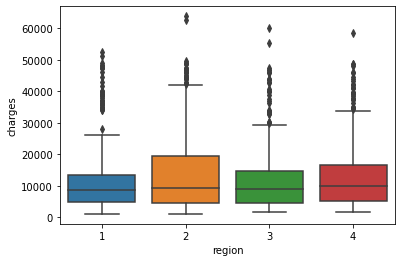

In [65]:
sns.boxplot(x='region',y='charges',data=df_ins)

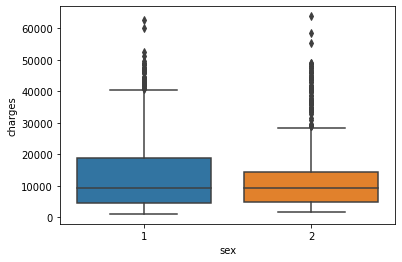

In [63]:
sns.boxplot(x='sex',y='charges',data=df_ins)

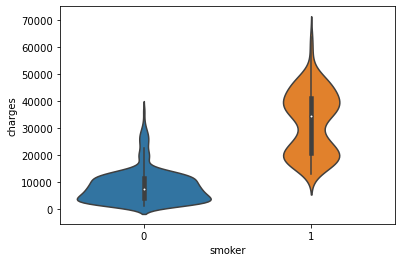

In [30]:
sns.violinplot(x=df_ins['smoker'],y=df_ins['charges'],data=df_ins)

**CLEARLY FROM ABOVE TWO PLOTS WE CAN SEE CHARGES FOR SMOKER IS HIGHER THAN NON-SMOKER**

**1=SMOKER,0=NON-SMOKER**

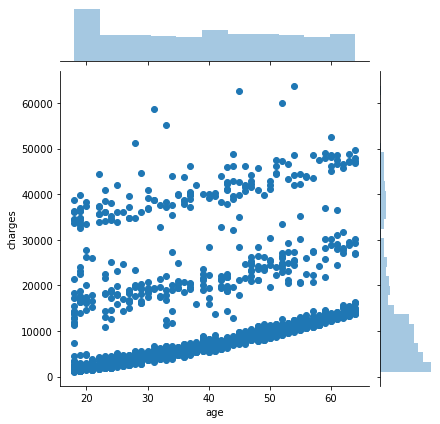

In [32]:
sns.jointplot(x=df_ins['age'],y=df_ins['charges'],data=df_ins)

**WE CAN SEE AS THE AGE IS INCREASING,THE CHARGES FOR MEDICAL INSURANCE IS ALSO INCREASING**

****TRAINING OUR DATASET****   **(LINEAR REGRESSION MODEL)**

In [34]:
df_ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [35]:
#feature_selection
X=df_ins[['age','sex','bmi','children','smoker','region']]


#target_selection
y=df_ins['charges']


**IMPORTING MORE LIBRARIES**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
#SPLITTING THE DATA INTO TRAIN AND TEST

In [49]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [50]:
len(X_train)

936

In [51]:
len(X_test)

402

**TRAINING AND TESTING THE MODEL**

In [54]:
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

**PREDICTIONS FROM THE MODEL**

In [66]:
y_pred=model_1.predict(X_test)

In [67]:
y_pred[0:5]

array([ 5647.129901  ,  4075.39809292,  5835.79496967,  3281.76497375,
       32879.14373489])

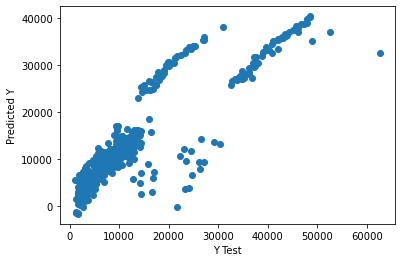

In [68]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

**MODEL EVALUATION**

In [71]:
from sklearn.metrics import r2_score
print('Linear Regression',r2_score(y_test,y_pred))

Linear Regression 0.7706608895242262


**LETS CALCULATE THE COST FOR ANY RANDOM PERSON FORM OUR MODEL**

In [77]:
new_data={'age':50,
     'sex':0,
     'bmi':45.5,
     'children':2,
     'smoker':0,
     'region':2
    
}
index=[1]
new_df=pd.DataFrame(new_data,index)
new_df

,age,sex,bmi,children,smoker,region
1,50,0,45.5,2,0,2


In [78]:
pred_new=model_1.predict(new_df)
print('Medical Insurance cost of new person will be :',pred_new)

Medical Insurance cost of new person will be : [16032.97768273]
